# Project 1 - Reinforcement Learning - MO436

#### Group: Arthur Guazzelli, Elian Laura, Iury Cleveston, Maria Tejada

## 1) Environment Description

In this project, we used the FrozenLake 8x8 environment from OpenAi Gym. This environment is represented as a grid with 8x8 tiles, where the goal is to cross the entire board without falling into ice holes. Frozen Lake is an episodic environment, where the initial state (S) is in the top-left position, and the terminal states are either the ice holes (H) or the final goal in the bottom-right tile (G). The ice holes are spread across the board, and the agent should find a path to the goal through frozen tiles (F); the reward of value of 1 is only given at this point.

<br>
<div>
<center><img src="board.png" width="100"/></center>
<center>Figure 1 - Frozen Lake Grid.</center>
</div>


The current state is represented as a single number corresponding to the tile where the agent has entered, ranging from 0 to 63; therefore, this environment is discrete and partial observable. The possible actions are moving north, east, south, and west. Frozen Lake is presented in a deterministic and stochastic way; the difference is in the slippery ice, where the agent might slip and reach an unexpected state.

The ice holes are close to feasible paths to the goal; also, the reward is delayed until the end. These characteristics make Frozen Lake a challenging environment, especially in the stochastic version, where the dynamics are unpredictable.

Codes are available at https://github.com/thurbridi/mo436-project-1

In [1]:
import sys
sys.path.insert(0, '../src')

## 2) Monte Carlo Control (iury)

The Monte Carlo Agent was initialized with the state-action values $Q(s, a)$ equal to 0. We employed a step-size $\alpha_{t} = \frac{1}{N(s_{t},a_{t})}$, where $N(s_{t},a_{t})$ refers to the number of times action $a$ was selected from the state $s$.

The trade-off between exploration and exploitation was determined by an $\epsilon-greedy$ policy, where $\epsilon_{t} = \frac{N0}{N0+N(s_{t})}$; $N0$ is an hyperparameter, and $N(s_{t})$ is the number of times the state $s$ has been visited. 

In this project, we implemented two versions: tabular and linear approximation. Also, we searched for the best parameters using grid search, and we evaluated the solutions in the deterministic and stochastic environment.

The equation used for tabular Monte Carlo improvement is:

$Q(s,a) = Q(s,a) + \frac{1}{N(s,a)}(G_{t} - Q(s,a))$,

where $G_{t} = \sum \gamma^{T-1}R_{k,T}$, and $N(s,a) = N(s,a) + 1$

For policy evaluation, we used:

$\pi(s) = \mathrm{argmax} Q(s,a)$,

In [2]:
from monte_carlo_tabular import *
from monte_carlo_approximator import *

### 2.1) Tabular & Deterministic

The first experiment consisted in applying the Monte Carlo First Visit in the tabular and deterministic environment. Therefore, we used a grid search technique to find the best solution given the parameters defined as:

$\mathrm{N0} \in [0.1, 1, 10]$,

$\mathrm{gamma} \in [1, 0.9, 0.5, 0.1]$,

$\mathrm{episodes} \in [100, 1000]$


In [3]:
grid_search_tabular(stochastic=False)

      n0  gamma  episodes  win/loss (%)  elapsed time (s)
0    0.1    1.0     100.0         100.0          0.226304
1    1.0    1.0     100.0         100.0          0.189473
2   10.0    1.0     100.0           2.0          0.072398
3    0.1    0.9     100.0         100.0          0.126679
4    1.0    0.9     100.0         100.0          0.124684
5   10.0    0.9     100.0           2.0          0.089683
6    0.1    0.5     100.0         100.0          0.145805
7    1.0    0.5     100.0         100.0          0.095972
8   10.0    0.5     100.0           2.0          0.069440
9    0.1    0.1     100.0         100.0          0.108018
10   1.0    0.1     100.0         100.0          0.075810
11  10.0    0.1     100.0           2.0          0.064267
12   0.1    1.0    1000.0         100.0          0.421142
13   1.0    1.0    1000.0         100.0          0.392267
14  10.0    1.0    1000.0         100.0          1.148584
15   0.1    0.9    1000.0         100.0          0.294481
16   1.0    0.

In this experiment, we varied the $N0$, gamma, and episodes. The win/loss metric is defined as the percentage of wins from 100 games plays; the majority of executions returned 100\% of wins. Only the executions with $N0=10$ and with 100 episodes could not achieved maximum success, due to the excessive exploration. The elapsed time presented a consistent correlation with the number of episodes.

We selected the execution number 4 to be analyzed in detail as follows:

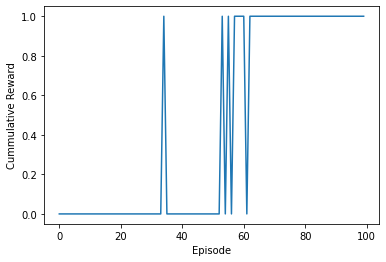

In [5]:
Q, env = train_tabular(stochastic=False, episodes=100, gamma=0.9, n0=1)

The cumulative discounted reward (G) by episode increased during training; the average variance has also decreased, which means the agent is learning a good policy. The exploration rate is initially set as $N0=1$; however, as the training continues, the states are being visited, and the agent started to select greedy actions, contributing to the cumulative reward's variance decrease in the end. 

The final board is shown below, where the agent was able to reach its goal:

In [13]:
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


We also reported the best state value ($V_*$) and the best policy ($\pi_*$), as follows:

In [14]:
print_state_values_tabular(Q)


		 State Value
------------------------------------------------
 0.11| 0.14| 0.00| 0.22| 0.26| 0.30| 0.00| 0.00|
------------------------------------------------
 0.00| 0.14| 0.17| 0.20| 0.09| 0.37| 0.41| 0.04|
------------------------------------------------
 0.00| 0.03| 0.03| 0.00| 0.24| 0.05| 0.49| 0.56|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.22| 0.60|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.18| 0.74|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.86|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 1.00|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00|
------------------------------------------------


In [15]:
print_policy_tabular(Q)


		 Policy/Actions
------------------------------------------------
  r  |  s  |  r  |  r  |  r  |  s  |  l  |  s  |
------------------------------------------------
  r  |  r  |  r  |  n  |  s  |  r  |  s  |  r  |
------------------------------------------------
  s  |  r  |  n  |  l  |  r  |  r  |  r  |  s  |
------------------------------------------------
  n  |  s  |  r  |  l  |  l  |  n  |  s  |  s  |
------------------------------------------------
  n  |  r  |  s  |  l  |  r  |  r  |  r  |  s  |
------------------------------------------------
  s  |  n  |  r  |  l  |  n  |  l  |  s  |  s  |
------------------------------------------------
  r  |  l  |  n  |  s  |  n  |  r  |  l  |  s  |
------------------------------------------------
  l  |  s  |  s  |  r  |  s  |  l  |  l  |  n  |
------------------------------------------------


The policy is shown by state, where the greedy actions can be:
<ul>
    <li>n - north</li>
    <li>r - right</li>
    <li>s - south</li>
    <li>l - left</li>
</ul>

Observing the $V_*$ plot and the best policy $\pi_*$, we noted that the agent preferred to explore the top-right quadrant of the grid, mainly because the path seems less risky. In this sense, most of the actions are to go right and then south. The cumulative return (G) is appropriately assigned to the trajectory, being larger in the goal state, and decreasing its value until the initial state.

### 2.2) Tabular & Stochastic

The second experiment employed the same methodology as the first one. In this case, we turned on the environment slippery, which adds stochasticity. Similarly, we searched for the best solution using the grid search algorithm using the following parameters:

$\mathrm{N0} \in [1, 100, 1000, 10000]$,

$\mathrm{gamma} \in [1, 0.9, 0.1]$,

$\mathrm{episodes} \in [10000, 100000]$

This time we increased the number of episodes and the $N0$ constant to enable more exploration in the environment.

In [16]:
grid_search_tabular(stochastic=True)

         n0  gamma  episodes  win/loss (%)  elapsed time (s)
0       1.0    1.0   10000.0           7.0          5.432594
1     100.0    1.0   10000.0          28.0          7.623629
2    1000.0    1.0   10000.0          55.0          9.491570
3   10000.0    1.0   10000.0          36.0         12.016099
4       1.0    0.9   10000.0           1.0          5.742304
5     100.0    0.9   10000.0          12.0          8.934242
6    1000.0    0.9   10000.0          43.0          9.263228
7   10000.0    0.9   10000.0           2.0         10.051708
8       1.0    0.1   10000.0           4.0          7.212385
9     100.0    0.1   10000.0           0.0          8.766804
10   1000.0    0.1   10000.0           1.0         11.912093
11  10000.0    0.1   10000.0           2.0          9.833791
12      1.0    1.0  100000.0          13.0         63.864103
13    100.0    1.0  100000.0          26.0         96.923429
14   1000.0    1.0  100000.0          60.0        128.208909
15  10000.0    1.0  1000

However, when the environment is stochastic, the agent has enormous difficulties in learning a good policy. Half of the executions returned a success rate inferior to 10\%. Nevertheless, the other executions were promising, especially the numbers 14 and 2, with win rates of 60\% and 55\%, respectively. The elapsed time has dramatically increased, primarily due to the increase in the number of episodes. The best solution was achieved by providing intermediate exploration with $N0=1000$. Also, the discount factor significantly impacted the win rate; the best results were achieved using a rate greater than 0.9.

Now, we will analyze the solution number 2:

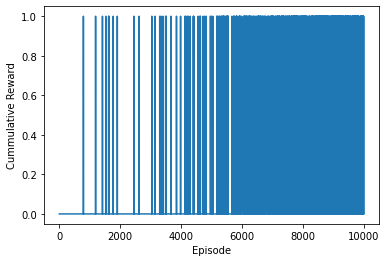

In [6]:
Q, env = train_tabular(stochastic=True, episodes=10000, gamma=1, n0=1000)

The cumulative discounted reward has a large variance due to the stochasticity. However, the agent can reach the goal state most of the time; as the training proceeds, the agent retrieves more rewards. Due to the unknown dynamics, the agent falls into the ice holes more frequently, even when selecting the appropriate action, as shown below:

In [10]:
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Following our methodology, we plot the state value ($V_*$) and the derived policy $\pi_*$.

In [7]:
print_state_values_tabular(Q)


		 State Value
------------------------------------------------
 0.05| 0.06| 0.06| 0.08| 0.08| 0.10| 0.14| 0.12|
------------------------------------------------
 0.05| 0.07| 0.06| 0.07| 0.08| 0.10| 0.11| 0.13|
------------------------------------------------
 0.02| 0.01| 0.02| 0.00| 0.05| 0.06| 0.14| 0.14|
------------------------------------------------
 0.01| 0.01| 0.00| 0.00| 0.01| 0.00| 0.14| 0.17|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.01| 0.07| 0.15| 0.23|
------------------------------------------------
 0.01| 0.00| 0.00| 0.00| 0.00| 0.05| 0.00| 0.35|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.04| 0.00| 0.59|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.25| 0.25| 0.50| 0.00|
------------------------------------------------


In [8]:
print_policy_tabular(Q)


		 Policy/Actions
------------------------------------------------
  n  |  r  |  s  |  r  |  n  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  n  |  s  |  l  |
------------------------------------------------
  r  |  r  |  n  |  l  |  n  |  r  |  r  |  s  |
------------------------------------------------
  n  |  n  |  l  |  r  |  r  |  n  |  r  |  s  |
------------------------------------------------
  l  |  l  |  l  |  l  |  n  |  s  |  n  |  r  |
------------------------------------------------
  l  |  n  |  r  |  s  |  s  |  r  |  s  |  r  |
------------------------------------------------
  s  |  s  |  r  |  n  |  n  |  s  |  n  |  r  |
------------------------------------------------
  r  |  l  |  r  |  s  |  s  |  n  |  s  |  s  |
------------------------------------------------


The state value was properly determined; it increases as the agent approaches the goal state. However, a curious behavior has emerged; the agent attempts to stay close to the game's border most of the time. Also, the actions are chosen to exploit the stochastic dynamics of the environment, like going right instead of south. The policy makes the agent avoid the holes in the first place while expecting to reach the desired state through the game's stochasticity. Further, in the stochastic version, the agent has found alternative paths to the goal.

### 2.3) Linear Function Approximation & Deterministic

The third experiment consisted of applying a linear function approximator (LFA) to avoid a complete state representation. In this sense, we aim to generalize to unseen states by using a linear combination of features, given as:

$w = w + \alpha_{t}[(G_{t} - x(S)^Tw)x(S)]$

$x(S) = RBF(\mathrm{current\_state}, \mathrm{mod\_state})$

The feature vector is generated by extracting several features to represent the state, such as the current state number and the mod state, which is the current state divided by their column number (8, considering the grid size). Twenty Radial Basis Functions (RBF) are employed to represent the state space; for this, we sampled 3000 states from the environment and fit the feature function. Then we used a linear combination of them to generate the policy. We also tested with polynomial feature functions; however, it has not provided good results.

In [4]:
grid_search_approximator(stochastic=False)

    alpha  gamma  eps  episodes  Total G Train  win/loss (%)  elapsed time (s)
0   0.100    1.0  0.9    1000.0     316.000000           0.0         36.047742
1   0.100    0.9  0.9    1000.0      39.957193           0.0         36.291694
2   0.100    0.1  0.9    1000.0       3.333333           0.0         33.191299
3   0.100    1.0  0.5    1000.0     438.000000           0.0         97.148110
4   0.100    0.9  0.5    1000.0      67.944745           0.0         66.153031
5   0.100    0.1  0.5    1000.0       5.555556           0.0         45.912886
6   0.100    1.0  0.1    1000.0     449.000000           0.0        214.719067
7   0.100    0.9  0.1    1000.0      77.002038           0.0        130.207591
8   0.100    0.1  0.1    1000.0       1.111111           0.0        242.903670
9   0.010    1.0  0.9    1000.0     338.000000           0.0         27.421843
10  0.010    0.9  0.9    1000.0      59.462351           0.0         24.824259
11  0.010    0.1  0.9    1000.0       3.333333      

The grid search has found a few executions with optimal policy, mainly those where alpha is 0.001. Also, the agent could only reach the goal with gamma greater than 0.9 and epsilon lower than 0.5. These parameters generate a policy that enables the agent to keep most of the reward through time and explore the policy more than explore the environment. We understand that the alpha and episodes play a significant role in the convergence since the agent requires more episodes to reach a reasonable solution when alpha is small. The time required to convergence is varied because sometimes the agent keeps executing inappropriate actions, which do not result in motion.

Another important metric is the accumulated reward during training. We noted that the agent could reach the goal during training and accumulate rewards many times; however, this does not always translate into a good policy. We hypothesize that the agent can accumulate reward by exploring the epsilon-greedy actions in training, but in the test, the agent gets stuck when only greedy actions are selected.  

We select one of our the best execution to analyse in detail, as shown:

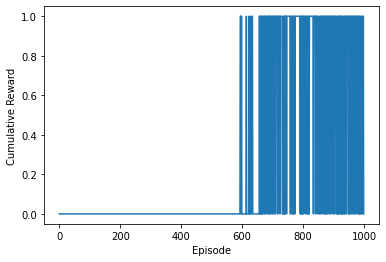

In [10]:
Q, env = train_approximator(stochastic=False, episodes=1000, gamma=1, alpha=0.001, eps=0.1)

In [15]:
play(env, Q)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FF

Observing the cumulative reward plot shows that the agent is improving its policy since the accumulated reward increases as the training ends. The gameplay also confirmed that the agent could generalize an action-value function to determine the best policy in each state. To evaluate the policy numerically, we printed the state values and policy:

In [11]:
print_state_values_approximator(env, Q)


		 State Value
------------------------------------------------
 0.5272| 0.6534| 0.7032| 0.7129| 0.7054| 0.6594| 0.5331| 0.5442|
------------------------------------------------
 0.5189| 0.6147| 0.6649| 0.6869| 0.6736| 0.5974| 0.5052| 0.7039|
------------------------------------------------
 0.4710| 0.5572| 0.5940| 0.5900| 0.5480| 0.4647| 0.6036| 0.7996|
------------------------------------------------
 0.4009| 0.4539| 0.4487| 0.4169| 0.3810| 0.3888| 0.6315| 0.8379|
------------------------------------------------
 0.2728| 0.2725| 0.2470| 0.2386| 0.2501| 0.3643| 0.6216| 0.8601|
------------------------------------------------
 0.0729| 0.0557| 0.0701| 0.1189| 0.1580| 0.3336| 0.6181| 0.8680|
------------------------------------------------
-0.0093|-0.0059| 0.0033| 0.0349| 0.1117| 0.3309| 0.6105| 0.8222|
------------------------------------------------
-0.0205|-0.0150|-0.0077| 0.0013| 0.1113| 0.3269| 0.5557| 0.7101|
------------------------------------------------


In [12]:
print_policy_approximator(env, Q)


		 Policy/Actions
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  r  |  r  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  r  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  r  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  s  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  s  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  s  |  s  |  s  |
------------------------------------------------
  l  |  l  |  n  |  r  |  s  |  s  |  s  |  s  |
------------------------------------------------
  l  |  l  |  n  |  n  |  s  |  s  |  s  |  s  |
------------------------------------------------


The Monte Carlo Control with Linear Function Approximation (LFA) provided an optimal policy most of the time. Observing the best state values ($V_*$) and best policy ($\pi_*$), we noted that the agent can reach the goal following the learned policy. The greedy actions are only going right and then south, which is optimal. In this sense, the LFA generalized to unseen states.

### 2.4)  Linear Function Approximation & Stochastic

The last experiment with MC Linear Function Approximation is employed in the stochastic environment, and a grid search determines the best parameters. In this case, we also used an epsilon of 0.1 in the test to make the agent free of getting stuck; if only greedy actions are selected, the percentage of wins gets a maximum value of 6\%.

In [3]:
grid_search_approximator(stochastic=True)

    alpha  gamma  eps  episodes  Total G Train  win/loss (%)  elapsed time (s)
0   0.010    1.0  0.5   10000.0     725.000000           0.0        654.040878
1   0.010    0.9  0.5   10000.0     325.896776           6.0        730.698742
2   0.010    0.1  0.5   10000.0      45.555556           0.0        812.738182
3   0.010    1.0  0.1   10000.0    4953.000000           0.0       1718.217440
4   0.010    0.9  0.1   10000.0     276.264654           0.0        958.625169
5   0.010    0.1  0.1   10000.0     147.777778           0.0       2177.223560
6   0.001    1.0  0.5   10000.0    7627.000000          48.0        587.652399
7   0.001    0.9  0.5   10000.0     295.219508           0.0        715.200193
8   0.001    0.1  0.5   10000.0      17.777778           0.0        724.436488
9   0.001    1.0  0.1   10000.0  126270.000000          20.0       8116.390173
10  0.001    0.9  0.1   10000.0    1408.655753           0.0       1096.665400
11  0.001    0.1  0.1   10000.0     147.777778      

The stochastic environment presented several nonlinearities, which made the solutions problematic. The best solution found in the test presented 48\% of wins, while most of them could not achieve any victory. The time for training also increased dramatically, probably due to the novel dynamics, which made the agent perform indefinitely actions that did not result in motion.

We selected the best solution to be analyzed in detail:

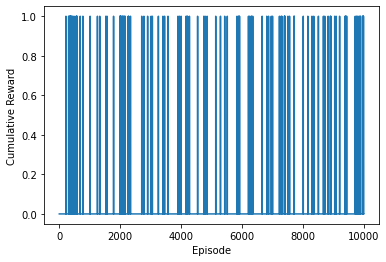

In [4]:
Q, env = train_approximator(stochastic=True, episodes=10000, alpha=0.001, gamma=1, eps=0.5)

In [5]:
env.render()

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [6]:
print_state_values_approximator(env, Q)


		 State Value
------------------------------------------------
 0.0496| 0.0664| 0.0690| 0.0727| 0.0788| 0.0815| 0.1033| 0.1289|
------------------------------------------------
 0.0556| 0.0679| 0.0644| 0.0731| 0.0783| 0.0943| 0.1308| 0.1756|
------------------------------------------------
 0.0523| 0.0575| 0.0515| 0.0604| 0.0741| 0.1112| 0.1749| 0.2419|
------------------------------------------------
 0.0355| 0.0400| 0.0396| 0.0445| 0.0708| 0.1291| 0.2172| 0.3030|
------------------------------------------------
 0.0124| 0.0239| 0.0316| 0.0372| 0.0680| 0.1454| 0.2530| 0.3507|
------------------------------------------------
-0.0082| 0.0095| 0.0206| 0.0249| 0.0669| 0.1604| 0.2780| 0.3743|
------------------------------------------------
-0.0267|-0.0091| 0.0033| 0.0099| 0.0696| 0.1712| 0.2837| 0.3648|
------------------------------------------------
-0.0465|-0.0306|-0.0135| 0.0013| 0.0729| 0.1696| 0.2635| 0.3233|
------------------------------------------------


In [7]:
print_policy_approximator(env, Q)


		 Policy/Actions
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  l  |  l  |
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  s  |  r  |  r  |  r  |  r  |
------------------------------------------------


Similarly, when the environment is stochastic, the agent has much more difficulty executing the appropriate actions. In this case, the agent tries to hack the environment by staying close to the game's border in an attempt to avoid the ice holes. Also, the nonlinearities made the linear function approximation complex; although the RBF covered the whole grid, the linear combinations could not correctly assign the credits; some actions are not optimal. 

## 3) Q-learning

## 4) SARSA(λ)